In [41]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [42]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data = pd.read_csv(
    Path('Resources/lending_data.csv')
)

# Review the DataFrame
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [43]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data['loan_status']

# Separate the X variable, the features
X = lending_data.drop(columns = 'loan_status')

In [44]:
# Review the y variable Series
# YOUR CODE HERE!
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [45]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [46]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [47]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state = 1
)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [48]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [49]:
# Make a prediction using the testing data
prediction = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [50]:
# Print the balanced_accuracy score of the model
print(balanced_accuracy_score(y_test, prediction))

0.9520479254722232


In [51]:
# Generate a confusion matrix for the model
print(confusion_matrix(y_test, prediction))

[[18663   102]
 [   56   563]]


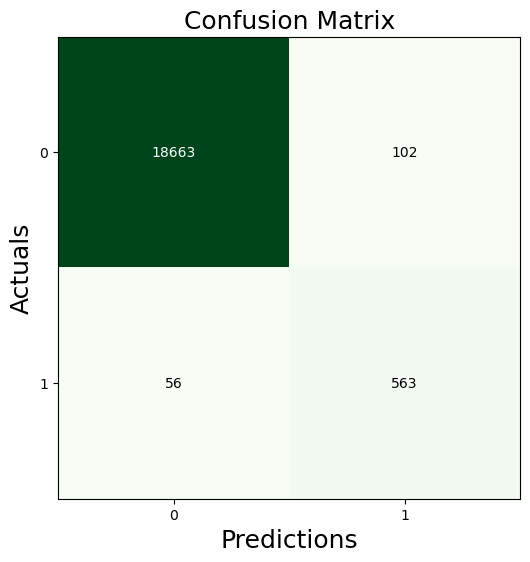

In [52]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [53]:
# Print the classification report for the model
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 

Base on the report, the model performs well with the 95% balanced accuracy. However, confusion matrix shows that the data is imbalanced. Therefore, without adjustment the result can't be trust. 

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [54]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
resampling = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X1_test, y1_test = resampling.fit_resample(X_train, y_train)

In [55]:
# Count the distinct values of the resampled labels data
y1_test.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [56]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model1 = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
model1.fit(X1_test, y1_test)

# Make a prediction using the testing data
prediction1 = model1.predict(X1_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [57]:
# Print the balanced_accuracy score of the model 
print(balanced_accuracy_score(y1_test, prediction1))

0.9947308560359689


In [58]:
# Generate a confusion matrix for the model
print(confusion_matrix(y1_test, prediction1))

[[55964   307]
 [  286 55985]]


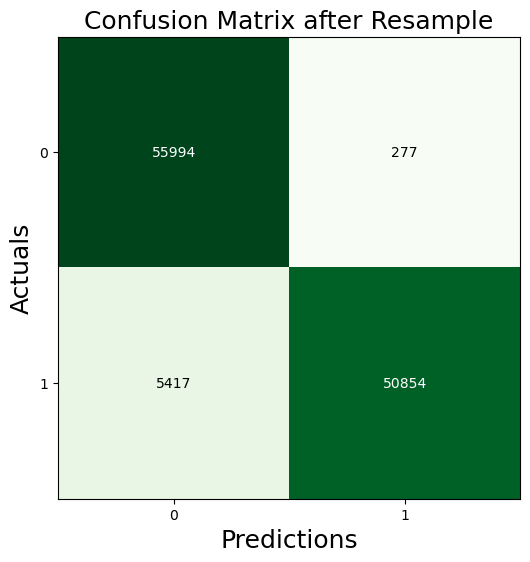

In [61]:
y1_pred = model.predict(X1_test)

conf1_matrix = confusion_matrix(y_true=y1_test, y_pred=y1_pred)

fig, ax = plot_confusion_matrix(conf_mat=conf1_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix after Resample', fontsize=18)
plt.show()

In [60]:
# Print the classification report for the model
print(classification_report(y1_test, prediction1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56271
           1       0.99      0.99      0.99     56271

    accuracy                           0.99    112542
   macro avg       0.99      0.99      0.99    112542
weighted avg       0.99      0.99      0.99    112542



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Using oversampling method the accuracy rate of the model increased. Also, confusion matrix shows that the data is balanced which indicate logistic regression model after oversampling fits well.